<a href="https://colab.research.google.com/github/IgorColetoBueno/data-science-starter/blob/main/class_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
import pandas as pd

data = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv')

# normalizing data
data['sold'] = data['sold'].replace({'yes':1, 'no':0})
data['age'] = datetime.today().year - data['model_year']

x = data[['mileage_per_year', 'age', 'price']]
y = data['sold']

y.head()

0    1
1    1
2    0
3    0
4    1
Name: sold, dtype: int64

75.92


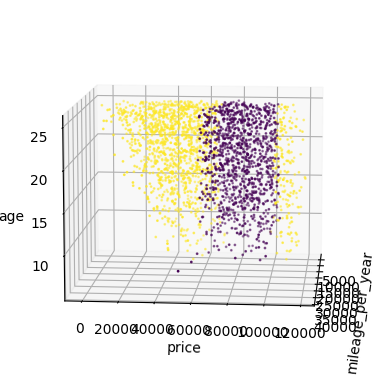

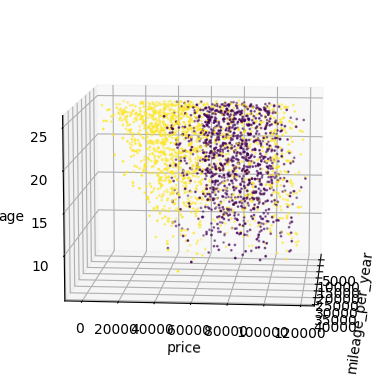

In [8]:
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(20)
cmap = plt.get_cmap('viridis')

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)

predictions = model.predict(test_x)

score = accuracy_score(test_y, predictions) * 100

print(score)

sea_plot = plt.axes (projection='3d')
sea_plot.scatter3D(raw_test_x['mileage_per_year'], raw_test_x['price'], raw_test_x['age'], s=1, c=predictions, cmap=cmap)
sea_plot.set_xlabel ('mileage_per_year')
sea_plot.set_ylabel ('price')
sea_plot.set_zlabel ('age')
sea_plot.view_init(elev=10, azim=5)
plt.show ()

sea_plot = plt.axes (projection='3d')
sea_plot.scatter3D(raw_test_x['mileage_per_year'], raw_test_x['price'], raw_test_x['age'], s=1, c=test_y, cmap=cmap)
sea_plot.set_xlabel ('mileage_per_year')
sea_plot.set_ylabel ('price')
sea_plot.set_zlabel ('age')
sea_plot.view_init(elev=10, azim=5)
plt.show ()

78.4


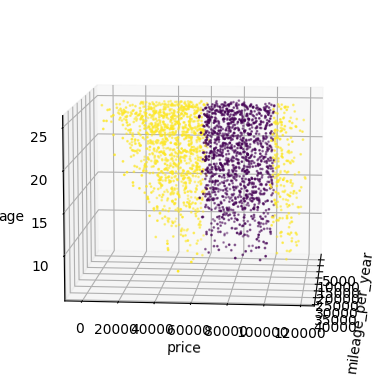

In [16]:
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(20)
cmap = plt.get_cmap('viridis')

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)


model = DecisionTreeClassifier(max_depth=3)
model.fit(raw_train_x, train_y)

predictions = model.predict(raw_test_x)

score = accuracy_score(test_y, predictions) * 100

print(score)

sea_plot = plt.axes (projection='3d')
sea_plot.scatter3D(raw_test_x['mileage_per_year'], raw_test_x['price'], raw_test_x['age'], s=1, c=predictions, cmap=cmap)
sea_plot.set_xlabel ('mileage_per_year')
sea_plot.set_ylabel ('price')
sea_plot.set_zlabel ('age')
sea_plot.view_init(elev=10, azim=5)
plt.show ()

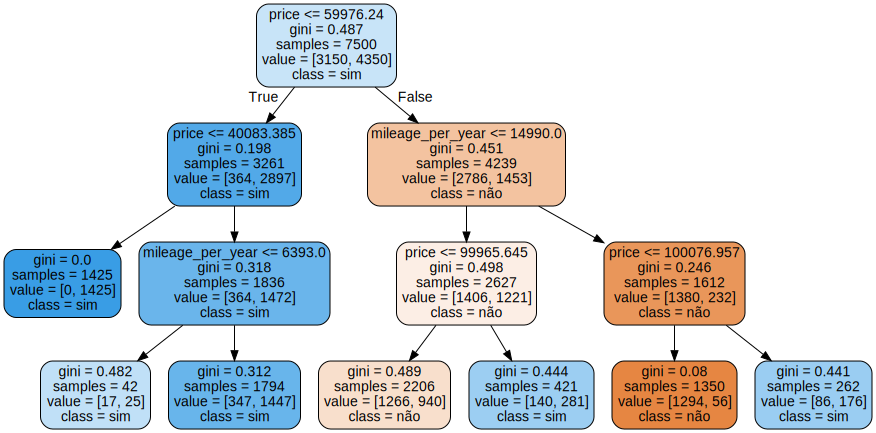

In [19]:
import graphviz

features = x.columns
dot_data = export_graphviz(model, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
chart = graphviz.Source(dot_data)
chart